# <u>**InPoDa:Collecte, Traitement, et Analyse de Données de Réseaux Sociaux**</u>



# Bibliothèques utilisées dans le Projet Inpoda

1. **Importation des bibliothèques** :
    - `json` : pour travailler avec des données au format JSON.
    - `re` : pour effectuer des opérations de recherche de motifs (regex).
    - `pandas` : pour manipuler et analyser des données tabulaires avec des DataFrames.
    - `TextBlob` de la bibliothèque `textblob` : pour effectuer une analyse de sentiment sur le texte des tweets.
    - `matplotlib.pyplot` : pour créer des visualisations avec Matplotlib.
    - `random` : pour générer des nombres aléatoires.
    - `plotly.express` : pour créer des visualisations interactives avec Plotly Express.
    - `seaborn` : pour améliorer le style des graphiques avec Seaborn.
    - `corpora` et `models` de la bibliothèque `gensim` : pour effectuer une analyse de texte avec le modèle Bag of Words.
    - `word_tokenize` et `stopwords` de la bibliothèque `nltk` : pour le traitement du langage naturel.
    - `preprocess_string` de la bibliothèque `gensim.parsing.preprocessing` : pour prétraiter les chaînes de texte.
    - `detect` de la bibliothèque `langdetect` : pour détecter la langue du texte.

2. **Fonction Sentiment Analysis** :
    - Une fonction `sentiment(tweet_id)` qui prend un identifiant de tweet, extrait le texte associé à l'aide de Pandas, puis utilise TextBlob pour calculer la polarité du sentiment.

3. **Utilisation de Plotly Express** :
    - Utilisation de Plotly Express pour créer un graphique interactif à barres des hashtags les plus courants.

4. **Utilisation de Seaborn et Matplotlib** :
    - Utilisation de Seaborn pour améliorer le style des graphiques.
    - Utilisation de Matplotlib pour créer un graphique à barres des arobases les plus mentionnées.

5. **Analyse de texte avec Gensim et NLTK** :
    - Utilisation de Gensim et NLTK pour effectuer une analyse de texte, y compris la tokenisation et le retrait des mots vides.

N'oubliez pas d'installer les bibliothèques nécessaires en utilisant `pip install [nom de la bibliothèque]` si elles ne sont pas déjà installées.

In [88]:
import json
import re
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import random
import plotly.express as px
import seaborn as sns
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import preprocess_string
from langdetect import detect


# Le DataFrame 


In [44]:
df = pd.read_json("zone_atterissage.json")
print(df)

                       id        AuthorLocation             CreatedAt  \
0     1415291904850153472                        2021-07-14T12:47:39Z   
1     1415291947560828928   Mysore  and  BERLIN  2021-07-14T12:47:49Z   
2     1415291877897605120                        2021-07-14T12:47:33Z   
3     1415291886860967936                        2021-07-14T12:47:35Z   
4     1415291968700264448              Internet  2021-07-14T12:47:54Z   
...                   ...                   ...                   ...   
1703  1421408743770791936    Liverpool, England  2021-07-31T09:53:47Z   
1704  1421424066305605632                        2021-07-31T10:54:40Z   
1705  1421423882427371520             127.0.0.1  2021-07-31T10:53:57Z   
1706  1421423971858149376  Singapore, Singapore  2021-07-31T10:54:18Z   
1707  1421423964845395968  Torremolinos, España  2021-07-31T10:54:16Z   

      RetweetCount TweetLanguage  \
0                0            en   
1                2            en   
2              

# Trouver les tweets affiliés à une mention utilisateur

In [15]:

def find_user_mention(mention):
    for tweet in df["TweetText"]:
        if mention in tweet:
            print(mention)
            print(tweet)
find_user_mention("@jason_lazer")

@jason_lazer
RT @jason_lazer: Remain didn't micro target 3 billion untrue adverts using hacked data- Cummings thanked AIQ and said they couldn't have wo…


# Trouver les tweets affiliés à un hashtag

In [14]:

def find_user_hashtags(hashtag):
    for tweet in df["TweetText"]:
        if hashtag in tweet:
            print(hashtag)
            print(tweet)
find_user_hashtags("#ml")

#ml
RT @AINewsFeed: Artificial Intelligence System Market key trends and opportunities to 2027 - WhaTech https://t.co/tl4LVIY4gt #ai #ml #dl
#ml
RT @AINewsFeed: Listen: An introduction to Artificial Intelligence https://t.co/7RqGlqMOv7 #ai #ml #dl
#ml
RT @AINewsFeed: Artificial intelligence wants to solve our insomnia problem | Metro News https://t.co/dFDDZYFEWW #ai #ml #dl
#ml
And Now This:  Artificial Intelligence the hottest skill to have in post-pandemic world: Survey - Mint#pyton #python #pythonic #ml #machinelearningRead More Here:https://t.co/WjQlw4RGRP
#ml
How Artificial Intelligence Will Shape Our Future https://t.co/71KNPV45Nk #ai #ml #dl
#ml
RT @AINewsFeed: Artificial intelligence helps improve NASA's eyes on the Sun https://t.co/dvhAPRydui #ai #ml #dl
#ml
RT @AINewsFeed: Open Access Articles - Artificial Intelligence in the Life Sciences - Journal - Elsevier https://t.co/updkIQKSnw #ai #ml #dl
#ml
RT @AINewsFeed: New Doc Recreates Anthony Bourdain’s Voice with AI, Creeps Pe

# Trouver les tweets affiliés à un utilisateur specifique 

In [50]:
def find_user(user):
    # Nom de l'auteur à rechercher
    nom_auteur_recherche = user

    # Filtrer les tweets de l'auteur spécifié
    tweets_auteur = df[df["Author"] == nom_auteur_recherche]

    # Vérifier si des tweets ont été trouvés pour l'auteur spécifié
    if not tweets_auteur.empty:
        # Accéder au texte de tous les tweets de l'auteur
        textes_tweets_auteur = tweets_auteur["TweetText"].tolist()

        # Afficher les textes des tweets
        for texte_tweet in textes_tweets_auteur:
            print("Texte du tweet:", texte_tweet)
            print("\n")
    else:
        print("Aucun tweet trouvé pour l'auteur spécifié.")

find_user("VagueDePlume")

Texte du tweet: RT @SPHEREEdu Combining artificial intelligence technology with speech analysis researchers report while AI can be used to assess speech


Texte du tweet: RT @AjAntonicello Would you like to learn a language from a friendly Artificial Intelligence httpstcouK1ixfTwOf


Texte du tweet: New Texas AampM lab works to eliminate bias in artificial intelligence and machine learning httpstcoL3jorquxFN  #ArtificialIntelligence #MachineLearning


Texte du tweet: RT @TheAIHub One of our goals is to help our industry partners find solutions and optimize their processes and platforms by implementing a


Texte du tweet: RT @akbarth3great #technology #psychology #ai #artificialintelligence #johnmccarthy Artificial Intelligence The Rise Of The AI https


Texte du tweet: AIoT When Artificial Intelligence AI meets the Internet of Things IoT httpstcoMsKgsZYw2q


Texte du tweet: RT @ResearchEurope ERC agency wants to use artificial intelligence to find evaluators httpstcoa0hvdhl84m


Texte 

# Extraction de la liste de hashtags de la publication avec l'autheur du tweet




In [19]:
import re
def extraction_hashtags(id):
    tweet_recherche = df.loc[df['Author'] == id]
    texte_du_tweet = tweet_recherche['TweetText'].values[0]
    pattern = r'#\w+'
    print(texte_du_tweet)
    print(re.findall(pattern, texte_du_tweet))
extraction_hashtags("OrageTwitter")

RT @pb3060: Abdullll ki Iq level ko 21 topo ki salami #Artificial_Intelligence https://t.co/UnaYZWjR1D
['#Artificial_Intelligence']


# Analyse de sentiment de la publication (le sentiment peut être positif ou bien négatif).

In [91]:
def sentiment(id):
    s = df.loc[df['id'] == id]
    texte= s['TweetText']
    texte=str(texte)
    blob =TextBlob(texte)
    sentiment = blob.sentiment
    r=sentiment.polarity
    if r<=0:
        return '😞'
    else:
        return '😀'

print(sentiment(1415291877897605120))

😞


 # Extraction de la liste des utilisateurs mentionnées de la publication avec l'autheur du tweet

In [22]:
def extraction_user(id):
    tweet_recherche = df.loc[df['Author'] == id]
    texte_du_tweet = tweet_recherche['TweetText'].values[0]
    pattern = r'@\w+'
    print(texte_du_tweet)
    liste = re.findall(pattern, texte_du_tweet)
    return liste
extraction_user("RafaleTweeter")

RT @IainLJBrown: Global Artificial Intelligence/Machine Learning Platforms Growth Opportunities - GlobeNewswireRead more here: https://t.…


['@IainLJBrown']

# Le nombre de publications par utilisateur

In [29]:
def nb_pub_par_user(auteur):
    s=0
    for i in df["Author"]:
        if auteur==i:
            s=s+1
    return s
print(nb_pub_par_user(str(input("user: "))))

20


# Top K hashtags

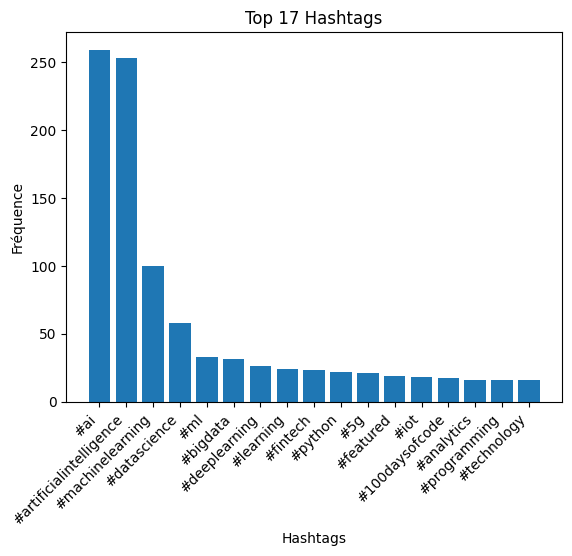

In [54]:
def topk_hashtag(k):
    hashtags_freq = {}  # Dictionnaire pour stocker la fréquence des hashtags

    for tweet_text in df["TweetText"]:
        hashtags = re.findall(r'#\w+', tweet_text)  # Trouver tous les hashtags dans le texte
        for hashtag in hashtags:
            # Convertir en minuscules pour compter de manière insensible à la casse
            hashtag = hashtag.lower()
            if hashtag in hashtags_freq:
                hashtags_freq[hashtag] += 1
            else:
                hashtags_freq[hashtag] = 1

    # Trier les hashtags par fréquence décroissante
    sorted_hashtags = sorted(hashtags_freq.items(), key=lambda x: x[1], reverse=True)

    # Sélectionner les k hashtags les plus courants
    top_k_hashtags = dict(sorted_hashtags[:k])

    # Créer un graphique à barres avec Matplotlib
    plt.bar(top_k_hashtags.keys(), top_k_hashtags.values())
    plt.xlabel('Hashtags')
    plt.ylabel('Fréquence')
    plt.title(f'Top {k} Hashtags')
    plt.xticks(rotation=45, ha="right")
    plt.show()

# Exemple d'utilisation pour afficher les 5 hashtags les plus courants
topk_hashtag(int(input("Top K hashtags : ")))


# Top K mention

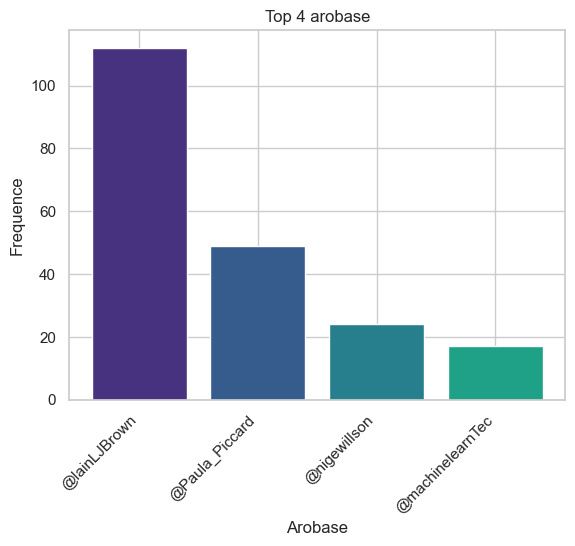

In [70]:
def topKmentionne(k):
    dic={}
    for tweet in df["TweetText"]:
        arobases = re.findall(r'@\w+', tweet)
        for arobase in arobases:
              # Convertir en minuscules pour compter de manière insensible à la casse
            if arobase in dic:
                dic[arobase] += 1
            else:
                dic[arobase] = 1
    sorted_arobases = sorted(dic.items(), key=lambda x: x[1], reverse=True)
    top_k_arobases = dict(sorted_arobases[:k])
    sns.set(style="whitegrid")
    plt.bar(top_k_arobases.keys(), top_k_arobases.values(), color=sns.color_palette("viridis"))
    plt.xlabel("Arobase")
    plt.ylabel("Frequence")
    plt.title(f"Top {k} arobase")
    plt.xticks(rotation=45, ha="right")
    plt.show()
topKmentionne(int(input("Top K arobase: ")))

# Top K utilisateur

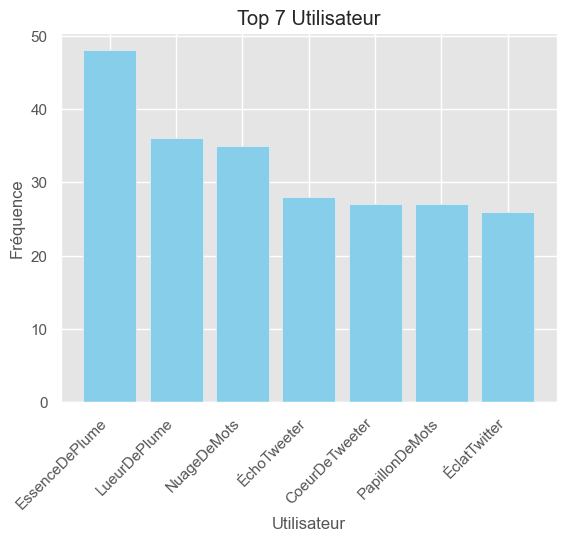

None


In [86]:
def topk_utilisateur(k):
    dico={}
    p=[]
    for auteur in df["Author"]:
        if auteur in dico:
            dico[auteur]+=1
        else:
            dico[auteur]=1
    sorted_utlisateur = sorted(dico.items(), key=lambda x: x[1], reverse=True)
    top_k_user = dict(sorted_utlisateur[:k])

    plt.style.use('ggplot')

    plt.bar(top_k_user.keys(), top_k_user.values(), color='skyblue')
    plt.xlabel("Utilisateur")
    plt.ylabel("Fréquence")
    plt.title(f"Top {k} Utilisateur")
    plt.xticks(rotation=45, ha="right")
    plt.show()

    
print(topk_utilisateur(int(input("Top K utilisateur: "))))
